# Twitter-Data-Wrangling-Project

This a data wrangling project by Udacity on the ratings of dogs from a Twitter handle @WeRateDogs. The twitter account used consists of pictures of various dogs and their ratings which are most times rated over 10.Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.
The goal of the project was to wrangle WeRateDogs Twitter data to create excellent and accuarate analysis and visualizations. This is done using Python and it's frameworks; from collecting the data to cleaning and analysing it, and finally visualizing trends from the data.

This project is on data wrangling and is one of the many projects to be completed in partial fulfillment of the Udacity Data analysis nanodegree.

The task carried out are:

Gathering Data
Assessing Data
Cleaning and storing Data
Analyzing and Visualizing Data

## Data Gathering

These three pieces of data described below were gathered in this jupyter notebook

1) twitter_archive_enhanced.csv: 
this file was downloaded manually from an URL provided by Udacity.

2) The tweet image prediction:
This comprises of what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) hosted on Udacity's servers was downloaded programmatically using the Requests library and the following URL: [https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv]

2) JSON file from Twitter API:
This file contains each tweet's retweet count and favorite (i.e. "like") count at minimum, and any additional data. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and stored each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data was written to its own line, after which this .txt file was read line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.

In [1]:
#import all libraries and frameworks for analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
import time
import datetime
import requests
import json
import tweepy
import io
import os

In [2]:
#load and read the dataframe (twitter-archive-enhanced.csv)

df_1 = pd.read_csv('twitter-archive-enhanced.csv')
df_1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [3]:
#programmatically download The tweet image predictions tsv file from the url provided

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)
    
image_prediction = pd.read_csv('image-predictions.tsv', sep= '\t')
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [4]:
#write a program to query twitter API for each tweet in the twitter archive and save JSON file as a text file

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

consumer_key = '**********************************'
consumer_secret = '********************************************'
access_token = '*************************************************'
access_secret = '*********************************************'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [5]:
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257


AttributeError: module 'tweepy' has no attribute 'TweepError'

In [6]:
#reading the line by line to get each json data and store in a list
with open('tweet_json.txt', 'r') as json_file:
    file = []
    for line in json_file:
        lines = line.replace('\n', '')
        file.append(lines)
line_length = len(file)
tweet_id = []
retweet_count = []
favourite_count = []
tweet_date = []
data = {'tweet_id': [], 'retweet_count':[], 'favorite_count':[]}
for a in range(line_length):
    dictionary = json.loads(file[a])
    tweet_id.append(dictionary['id'])
    retweet_count.append(dictionary['retweet_count'])
    favourite_count.append(dictionary['favorite_count'])
data.update({'tweet_id':tweet_id, 'retweet_count': retweet_count, 'favorite_count' : favourite_count})
df_twitterApi = pd.DataFrame(df_1)

df_twitterApi

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


## Assessing Data

After gathering the three data, the next step was assesing the data. 

The data were properly assessed using the two major assessment methods; quality and tidiness issues. 

1) Data quality issues: Data that have quality issues have issues with content like missing, duplicate, or incorrect data. This is called dirty data.

2) Data tidiness issues: Data that has specific structural issues that slow you down when cleaning and analyzing, visualizing, or modeling your data later.

Also the dataset was assessed in two ways; 
1) Visual assessment
2) Programmatically using code

In [7]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [8]:
df_1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [9]:
df_1.isnull()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
3,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
4,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2352,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2353,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2354,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False


In [10]:
df_1.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2351    False
2352    False
2353    False
2354    False
2355    False
Length: 2356, dtype: bool

In [11]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [13]:
image_prediction.isnull()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,False,False,False,False,False,False,False,False,False,False,False,False
2071,False,False,False,False,False,False,False,False,False,False,False,False
2072,False,False,False,False,False,False,False,False,False,False,False,False
2073,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
image_prediction.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2070    False
2071    False
2072    False
2073    False
2074    False
Length: 2075, dtype: bool

### Quality Issues

1. Dataframe 1: Some observations are retweets, Only tweets are needed.drop retweets 

2. Dataframe 3: Drop retweet columns in the dataframe scrapped using twitterAPI

3. Dataframe 1: Convert timestamp column to datetime

4. Dataframe 1: Convert tweet_id column to string

5. Dataframe 1: Create a list to contain all the names that starts with lowercase

6. Dataframe 1: Replace the names that start with lower case with the word "None

7. Dataframe 2: Convert the tweet_id column in image_prediction dataframe to string for image prediction data

8. Dataframe 2: Covert the tweet_id column in image_prediction dataframe to string

### Tidiness issues

1. Dataframe 1: The doggo, fluffer, pupper, poppo should be on one column.

2. Dataframe 2: The p1, p2 and p3 columns are merged to get the most likely breed of dog.

3. Merge the three dataframes to become one dataframe and merge them on tweet_id column

## Cleaning Data

The data was cleaned to improve its quality and tidiness.

The data used the three cleaning processes which are Define, Code, and Test.

Define: the issues that were gotten in the assessment were converted into cleaning tasks.
Code: the cleaning task is converted into code and then run.
Test: codes are tested to ensure they worked.

In [17]:
# Make copies of original pieces of data
df_1 = df_1.copy()
image_prediction_clean = image_prediction.copy()
df_twitterApi_clean = df_twitterApi.copy()

In [18]:
df_1.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [19]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [20]:
df_1.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

### 1st Quality issue

#### Define

Dropping retweeted columns and rows

In [21]:
# CODE

# Dropping retweeted rows
df_1 = df_1[df_1.retweeted_status_id.isnull()]
df_1 = df_1[df_1.retweeted_status_user_id.isnull()]
df_1 = df_1[df_1.retweeted_status_timestamp.isnull()]

In [22]:
# TEST

# Check if the retweets have been droped
print(df_1.retweeted_status_id.notnull().sum())
print(df_1.retweeted_status_user_id.notnull().sum())
print(df_1.retweeted_status_timestamp.notnull().sum())

0
0
0


In [23]:
# CODE

#dropping retweeted columns
df_1.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls'],axis =1, inplace = True)

In [24]:
# TEST

df_1.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


In [25]:
# TEST
# Check cleaning result
df_1.isnull().sum()

tweet_id              0
timestamp             0
source                0
text                  0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
dtype: int64

In [26]:
# TEST
# Checking results
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [27]:
df_twitterApi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### 2nd Quality Issue

#### Define

Drop retweet columns in the dataframe scrapped using twitterAPI

In [28]:
# CODE

# Drop retweeted rows
df_twitterApi = df_twitterApi[df_twitterApi.retweeted_status_id.isnull()]
df_twitterApi = df_twitterApi[df_twitterApi.retweeted_status_user_id.isnull()]
df_twitterApi = df_twitterApi[df_twitterApi.retweeted_status_timestamp.isnull()]

In [29]:
# TEST

# Check if the retweets have been droped
print(df_twitterApi.retweeted_status_id.notnull().sum())
print(df_twitterApi.retweeted_status_user_id.notnull().sum())
print(df_twitterApi.retweeted_status_timestamp.notnull().sum())

0
0
0


In [30]:
# CODE

# 2nd Quality issue cleanup; 

# dropping these columns
df_twitterApi.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls'],axis =1, inplace = True)

In [31]:
# TEST

df_twitterApi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   rating_numerator    2175 non-null   int64 
 5   rating_denominator  2175 non-null   int64 
 6   name                2175 non-null   object
 7   doggo               2175 non-null   object
 8   floofer             2175 non-null   object
 9   pupper              2175 non-null   object
 10  puppo               2175 non-null   object
dtypes: int64(3), object(8)
memory usage: 203.9+ KB


### Ist Tidiness issue 

#### Define 

The doggo, fluffer, pupper, poppo should be on one column.

In [32]:
# CODE

# First replace None in stage columns with empty string as follows
df_1.doggo.replace('None', '', inplace=True)
df_1.floofer.replace('None', '', inplace=True)
df_1.pupper.replace('None', '', inplace=True)
df_1.puppo.replace('None', '', inplace=True)

# Then combine stage columns
df_1['stage'] = df_1.doggo + df_1.floofer + df_1.pupper + df_1.puppo


# Then format entries with multiple dog stages which appeared like doggopuppo
df_1.loc[df_1.stage == 'doggopupper', 'stage'] = 'doggo,pupper'
df_1.loc[df_1.stage == 'doggopuppo', 'stage'] = 'doggo,puppo'
df_1.loc[df_1.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'

In [33]:
# TEST

# Checking if entries with multiple dog stages were formatted
df_1.stage.value_counts()

                 1831
pupper            224
doggo              75
puppo              24
doggo,pupper       10
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: stage, dtype: int64

In [34]:
# Drop the old columns
df_1.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#  Use np.nan to fill the empty spaces
df_1['stage'] = df_1['stage'].replace('', np.nan)

In [35]:
# TEST

df_1.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN


Good job!!!

In [36]:
# TEST

# Checking cleaning outcome
df_1.isnull().sum()

tweet_id                 0
timestamp                0
source                   0
text                     0
rating_numerator         0
rating_denominator       0
name                     0
stage                 1831
dtype: int64

###  2nd tidiness issue

#### Define

Some of the jpg_url in the image prediction dataset are not pictures of dogs.Drop The p1, p2 and p3 columns, because they are displayed false, meaning those pictures arent dog pictures.

In [37]:
# CODE

index_not_dogs = image_prediction.query('p1_dog==False and p2_dog==False and p3_dog==False').index
image_prediction.drop(index_not_dogs,inplace = True)

#### Test

In [38]:
len(image_prediction.query('p1_dog==False and p2_dog==False and p3_dog==False'))

0

In [39]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


### 3rd Quality Issue

#### Define

Convert timestamp column to datetime

In [40]:
# CODE

# Converting timestamp column to datetime
df_1['timestamp'] = pd.to_datetime(df_1['timestamp'])

In [41]:
# TEST

# Check results
df_1.dtypes

tweet_id                            int64
timestamp             datetime64[ns, UTC]
source                             object
text                               object
rating_numerator                    int64
rating_denominator                  int64
name                               object
stage                              object
dtype: object

### 4th Quality issue

#### Define

Convert tweet_id column to string

In [42]:
# CODE

# Convert tweet_id column to string
df_1['tweet_id'] = df_1['tweet_id'].astype(str)

In [43]:
# TEST

# Check result
df_1.dtypes

tweet_id                           object
timestamp             datetime64[ns, UTC]
source                             object
text                               object
rating_numerator                    int64
rating_denominator                  int64
name                               object
stage                              object
dtype: object

### 5th Quality issue

#### Define

Create a list to contain all the names that starts with lowercase

In [44]:
# CODE

# Create a list to contain all the names that starts with lowercase
notNames = []

for c in df_1.name:
    if c.islower() and c not in notNames:
        notNames.append(c)
    
print(notNames)

['such', 'a', 'quite', 'not', 'one', 'incredibly', 'very', 'my', 'his', 'an', 'actually', 'just', 'getting', 'mad', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']


### 6th Quality issue

#### Define


Replace the names that start with lower case with the word "None

In [45]:
# CODE

# Replace the names that start with lower case with the word "None
df_1.name.replace(notNames, 'None', inplace=True)

In [46]:
# Nothing prints when this code is run, So the lowercase entries are cleared.
for c in df_1.name:
    if c.islower():
        print(c)

In [47]:
# TEST

# Sample from edited 'name' and run a few times
df_1['name'].sample(10)

1395      Cooper
2127        None
715        Riley
2088      Antony
936         Hank
1520    Vinscent
920         None
941         Carl
505      Swagger
363       Astrid
Name: name, dtype: object

### 7th Quality issue

#### Define

Covert the tweet_id column in image_prediction dataframe to string

In [48]:
# CODE

# Convert the tweet_id column in image_prediction dataframe to string
df_twitterApi['tweet_id'] = df_twitterApi['tweet_id'].astype(str)

In [49]:
# TEST

# check if our cleaning effort worked
df_twitterApi.dtypes

tweet_id              object
timestamp             object
source                object
text                  object
rating_numerator       int64
rating_denominator     int64
name                  object
doggo                 object
floofer               object
pupper                object
puppo                 object
dtype: object

### 3rd  Tidiness issue

#### Define

Replace None in stage columns with empty string as follows; removing doggo, floofer, puppo and pupper columns in df_twitterApi 

In [50]:
# CODE

# Replace None in stage columns with empty string as follows
df_twitterApi.doggo.replace('None', '', inplace=True)
df_twitterApi.floofer.replace('None', '', inplace=True)
df_twitterApi.pupper.replace('None', '', inplace=True)
df_twitterApi.puppo.replace('None', '', inplace=True)

# combine stage columns
df_twitterApi['stage'] = df_twitterApi.doggo + df_twitterApi.floofer + df_twitterApi.pupper + df_twitterApi.puppo


# format entries with multiple dog stages 
df_twitterApi.loc[df_twitterApi.stage == 'doggopupper', 'stage'] = 'doggo,pupper'
df_twitterApi.loc[df_twitterApi.stage == 'doggopuppo', 'stage'] = 'doggo,puppo'
df_twitterApi.loc[df_twitterApi.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'

In [51]:
# TEST

# Checking if entries with multiple dog stages were formatted
df_twitterApi.stage.value_counts()

                 1831
pupper            224
doggo              75
puppo              24
doggo,pupper       10
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: stage, dtype: int64

In [52]:
# Drop the old columns
df_twitterApi.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#  Use np.nan to fill the empty spaces
df_twitterApi['stage'] = df_twitterApi['stage'].replace('', np.nan)

In [53]:
df_twitterApi.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN


### 8th Quality issue;

#### Define

Convert the tweet_id column in image_prediction dataframe to string for image prediction data

In [54]:
# CODE

# Covert the tweet_id column in image_prediction dataframe to string for image prediction data
image_prediction['tweet_id'] = image_prediction['tweet_id'].astype(str)

In [55]:
# TEST

# check if our cleaning effort worked
image_prediction.dtypes

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

### 4th tidiness issue 


### Define

Merge the three dataframes to become one dataframe and merge them on tweet_id column

In [56]:
# CODE

#Merge the three dataframes to become one dataframe and merge them on tweet_id column

data = pd.merge(df_1, image_prediction, on='tweet_id', how='inner').merge(df_twitterApi, on='tweet_id', how='inner' )

In [57]:
data.columns

Index(['tweet_id', 'timestamp_x', 'source_x', 'text_x', 'rating_numerator_x',
       'rating_denominator_x', 'name_x', 'stage_x', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'timestamp_y', 'source_y', 'text_y', 'rating_numerator_y',
       'rating_denominator_y', 'name_y', 'stage_y'],
      dtype='object')

In [58]:
# TEST

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 0 to 1685
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   tweet_id              1686 non-null   object             
 1   timestamp_x           1686 non-null   datetime64[ns, UTC]
 2   source_x              1686 non-null   object             
 3   text_x                1686 non-null   object             
 4   rating_numerator_x    1686 non-null   int64              
 5   rating_denominator_x  1686 non-null   int64              
 6   name_x                1686 non-null   object             
 7   stage_x               260 non-null    object             
 8   jpg_url               1686 non-null   object             
 9   img_num               1686 non-null   int64              
 10  p1                    1686 non-null   object             
 11  p1_conf               1686 non-null   float64            
 12  p1_dog

In [59]:
# TEST

data.head(10)

,tweet_id,timestamp_x,source_x,text_x,rating_numerator_x,rating_denominator_x,name_x,stage_x,jpg_url,img_num,...,p3,p3_conf,p3_dog,timestamp_y,source_y,text_y,rating_numerator_y,rating_denominator_y,name_y,stage_y
0,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,papillon,0.068957,True,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN
1,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,kelpie,0.031379,True,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN
2,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,spatula,0.040836,False,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN
3,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,German_short-haired_pointer,0.175219,True,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN
4,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,13,10,None,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,...,Indian_elephant,0.076902,False,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,13,10,None,NaN
5,890971913173991426,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,NaN,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,...,ice_lolly,0.193548,False,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,NaN
6,890729181411237888,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,13,10,None,NaN,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,...,Pembroke,0.076507,True,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,13,10,None,NaN
7,890609185150312448,2017-07-27 16:25:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,13,10,Zoey,NaN,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,...,Chesapeake_Bay_retriever,0.118184,True,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,13,10,Zoey,NaN
8,890240255349198849,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,...,Chihuahua,0.029248,True,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo
9,890006608113172480,2017-07-26 00:31:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,13,10,Koda,NaN,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1,...,chow,0.0

In [60]:
# TEST

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 0 to 1685
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   tweet_id              1686 non-null   object             
 1   timestamp_x           1686 non-null   datetime64[ns, UTC]
 2   source_x              1686 non-null   object             
 3   text_x                1686 non-null   object             
 4   rating_numerator_x    1686 non-null   int64              
 5   rating_denominator_x  1686 non-null   int64              
 6   name_x                1686 non-null   object             
 7   stage_x               260 non-null    object             
 8   jpg_url               1686 non-null   object             
 9   img_num               1686 non-null   int64              
 10  p1                    1686 non-null   object             
 11  p1_conf               1686 non-null   float64            
 12  p1_dog

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [61]:
# Saving the master dataset to a csv file
data.to_csv("twitter_archive_master.csv", index=False)

In [62]:
# Check result
data = pd.read_csv("twitter_archive_master.csv")

In [63]:
data.sample()

,tweet_id,timestamp_x,source_x,text_x,rating_numerator_x,rating_denominator_x,name_x,stage_x,jpg_url,img_num,...,p3,p3_conf,p3_dog,timestamp_y,source_y,text_y,rating_numerator_y,rating_denominator_y,name_y,stage_y
1203,680494726643068929,2015-12-25 21:06:00+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,26,10,None,NaN,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,1,...,Great_Pyrenees,0.064061,True,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,26,10,None,NaN


## Analyzing and Visualizing Data

In [64]:
#describe dataset;
data.describe()

,tweet_id,rating_numerator_x,rating_denominator_x,img_num,p1_conf,p2_conf,p3_conf,rating_numerator_y,rating_denominator_y
count,1.686000e+03,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1.686000e+03,1686.000000,1686.000000
mean,7.392710e+17,11.473903,10.534401,1.215896,0.605150,0.137147,6.135847e-02,11.473903,10.534401
std,6.800607e+16,8.106793,6.945891,0.576191,0.266416,0.101252,5.188051e-02,8.106793,6.945891
min,6.660209e+17,0.000000,2.000000,1.000000,0.044333,0.000010,2.160900e-07,0.000000,2.000000
25%,6.773835e+17,10.000000,10.000000,1.000000,0.378746,0.054938,1.598680e-02,10.000000,10.000000
50%,7.132943e+17,11.000000,10.000000,1.000000,0.606701,0.121432,4.995100e-02,11.000000,10.000000
75%,7.931770e+17,12.000000,10.000000,1.000000,0.851579,0.198428,9.468462e-02,12.000000,10.000000
max,8.921774e+17,165.000000,150.000000,4.000000,0.999984,0.467678,2.734190e-01,165.000000,150.000000


In [65]:
# Get the mean value of the dog names
data.name_y.value_counts() / data.shape[0] * 100

None          24.851720
a              2.728351
Charlie        0.593120
Lucy           0.593120
Cooper         0.593120
                ...    
Chevy          0.059312
Philbert       0.059312
Rupert         0.059312
Brudge         0.059312
Christoper     0.059312
Name: name_y, Length: 852, dtype: float64

#### Insight 1: About 25% of the dogs have no name

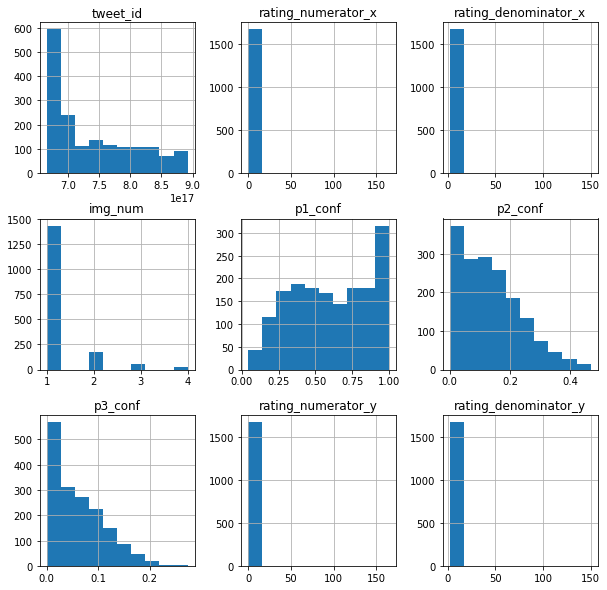

In [66]:
data.hist(figsize= (10,10));

####  Insight 2:Majority of the dogs had considerably really good ratings by users, judging from the histogram.

C:\Users\sharo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'The Distribution of Tweet Image Number')

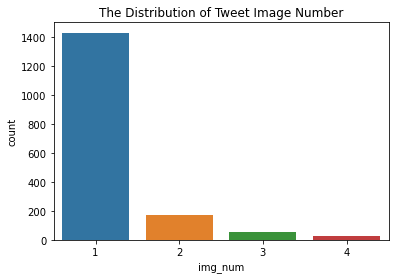

In [67]:
# Let's use countplot to get the distribution of the most frequent image number that corresponds 
# to the most confident prediction
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data.img_num)
plt.title('The Distribution of Tweet Image Number')

In [68]:
# Get the value count of each image number value
data.img_num.value_counts()

1    1432
2     171
3      56
4      27
Name: img_num, dtype: int64

#### Insight 3: The above graph shows that the most occcuring image number that corresponds to each tweet's most confident prediction is 1.

Text(0.5, 1.0, 'The Distribution of Dog Stages')

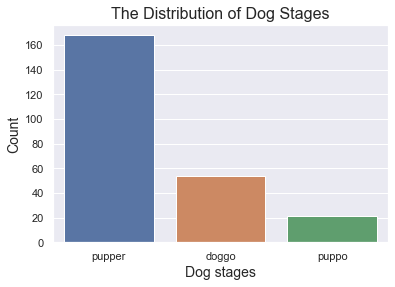

In [70]:
# Question 2; what is the most popular dog stage?

sns.set(style = 'darkgrid')
sorted_age = data['stage_x'].value_counts().head(3).index
sns.countplot(data = data, x ='stage_x', order = sorted_age, orient='h')
plt.xlabel('Dog stages', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('The Distribution of Dog Stages', fontsize=16)

In [72]:
# Get the value count of each dog stage
data.stage_x.value_counts()

pupper           168
doggo             54
puppo             21
doggo,pupper       8
floofer            7
doggo,puppo        1
doggo,floofer      1
Name: stage_x, dtype: int64

#####  Insight 3: The result shows that 'pupper' is the most popular dog stage, followed by 'doggo' and 'puppo'. Puppies are more adorable.

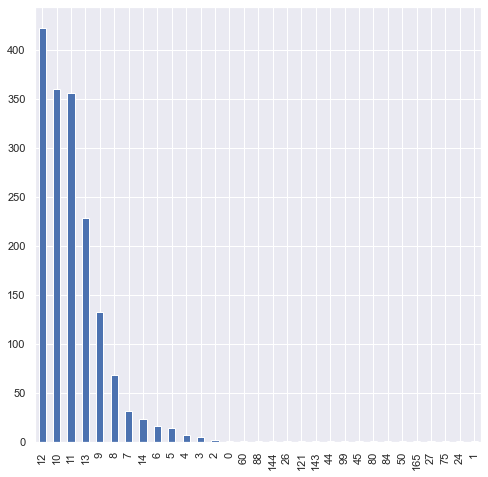

In [73]:
data['rating_numerator_y'].value_counts().plot(kind='bar', figsize= (8,8));

##### Insight 4: The pie chart shows the dog tweets had a larger number of really good ratings above the denominator of 10, with 12/10 having the highest rating number.

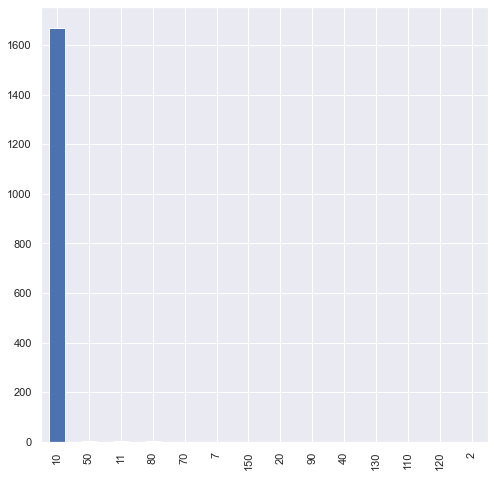

In [74]:
data['rating_denominator_y'].value_counts().plot(kind='bar', figsize= (8,8));

##### Insight 5: The bar chart shows the rating was done with a denominator of 10, and we had dogs that rated over 10.

### Conclusion

The detailed analyzed data set showed generally the dog tweets from the @weratedogs twitter account had really good ratings,majority of the ratings recorded over 10, with the highest ratings of 12/10 showing how loved and admired the dog tweet were perceived before viewers.
The data also showed how much the tweets were loved and rated by people who viewed them.This will undoubtedly increase social interactions for the @weratedogs twitter page, bring more followers/connections to the page thereby promoting growth and publicity for the page.
Statistics showed About 25% of the dogs have no name, also the above graph shows that the most occcuring image number that corresponds to each tweet's most confident prediction is 1.
The pupper breed had the most likes and rating, which shows how admirable these breeds were to the viewers. It will be encouraged that the we rate dogs twitter page post more dogs in the pupper category.

### Limitations

1)The dog stage had some missing values.
2)Some rating denominators had wrong values.